분류 성능비교
==

다루는 내용
--
- 정적 성능평가 Confusion matrix  
- 동적 성능평가 ROC

모듈 불러오기
--

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.preprocessing import StandardScaler, LabelEncoder
%matplotlib inline

##  정적 평가, 혼돈 매트릭스 (confusion_matrix)

In [2]:
# 평가 점수 score
y_score = np.linspace(99, 60, 20).round(1)
print(y_score)

[99.  96.9 94.9 92.8 90.8 88.7 86.7 84.6 82.6 80.5 78.5 76.4 74.4 72.3
 70.3 68.2 66.2 64.1 62.1 60. ]


In [15]:
# 예측 분류 (상위 14명)
y_pred=[0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1]
y_pred.count(1), y_pred.count(0)

(10, 10)

In [24]:
# 실제 값
y_test=[1,0,0,0,0,1,0,0,0,0,1,0,1,1,1,1,1,0,1,0]
y_test.count(1), y_test.count(0)

(9, 11)

In [25]:
confusion_matrix(y_test, y_pred)

array([[8, 3],
       [2, 7]], dtype=int64)

In [26]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.73      0.76        11
           1       0.70      0.78      0.74         9

   micro avg       0.75      0.75      0.75        20
   macro avg       0.75      0.75      0.75        20
weighted avg       0.76      0.75      0.75        20



- Precision  = 모델이 옳다고 한 것이 실제로 옳은 비율     TP / ( TP + FP ) 
- Recall =  실제 정답인 것들 중, 모델이 정답이라고 예측한 것    TP / TP+FN
- f1-score = Precision과 Recall의 조화평균  (2 x  Precision x Recall ) /  (Precision + Recall)
- support는 이 모델에서 응답한 샘플의 수이다

랭킹 (순서를 평가)
--

In [27]:
result = pd.DataFrame(list(zip(y_score, y_pred, y_test)), 
                      columns=['score', 'predict', 'real'])
result['correct'] = (result.predict == result.real)
result.head(20)

,score,predict,real,correct
0,99.0,0,1,False
1,96.9,0,0,True
2,94.9,0,0,True
3,92.8,0,0,True
4,90.8,0,0,True
5,88.7,0,1,False
6,86.7,0,0,True
7,84.6,0,0,True
8,82.6,0,0,True
9,80.5,0,0,True


ROC로 성능 평가 (맞춘 순서를 평가)
--

In [28]:
fpr = dict()
tpr = dict()
roc_auc = dict()
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

In [29]:
fpr, tpr

(array([0.        , 0.        , 0.36363636, 0.36363636, 0.72727273,
        0.72727273, 0.81818182, 0.81818182, 0.90909091, 0.90909091,
        1.        ]),
 array([0.        , 0.11111111, 0.11111111, 0.22222222, 0.22222222,
        0.33333333, 0.33333333, 0.88888889, 0.88888889, 1.        ,
        1.        ]))

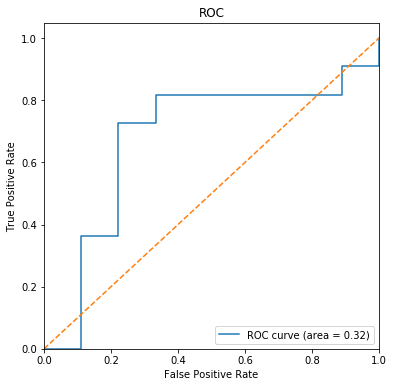

In [31]:
plt.figure(figsize=(6,6))
plt.plot(tpr, fpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")

## 3명의 능력 비교

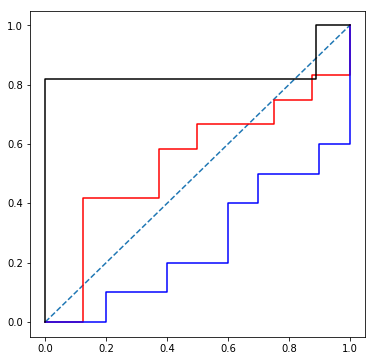

In [34]:
y_real=[[1,0,0,0,0,0,1,1,0,0,1,0,1,1,0,1,0,1,0,0],
        [1,1,0,1,1,0,1,1,0,0,1,0,1,1,0,1,0,0,0,0],
        [0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,0,0,1]]

plt.figure(figsize=(6,6))    
fpr = dict()
tpr = dict()
plt.plot([0, 1], [0, 1], linestyle='--')

my_color = ['r', 'b', 'k']
for i in range(3):
    fpr, tpr, _ = roc_curve(y_real[i], y_score)
    roc_auc = auc(fpr, tpr)
    plt.plot(tpr, fpr, c=my_color[i])